In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

Data Collection and Preparation

In [ ]:
#reading dataset

In [ ]:
data = pd.read_csv("Train.csv")

In [ ]:
data.head()

In [ ]:
#data preparation

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
#handling categorical values

In [ ]:
label_map = {}
for i in data.columns:
    if str(data[i].dtype) == 'object':
        temp = {}
        cats = data[i].unique()
        for index in range(len(cats)):
            temp[cats[index]] = index
        label_map[i] = temp
        data[i] = data[i].map(temp)
label_map

In [ ]:
#handling outlliers

In [ ]:
c=0
plt.figure(figsize=(18, 10))
for i in data.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N', 'ID']).columns:
    if str(data[i].dtype)=='object':
        continue
    plt.subplot(2, 3, c+1)
    plt.boxplot(data[i])
    plt.title(i)
    c+=1

plt.show()


In [ ]:
def check_outliers(arr):
    Q1 = np.percentile(arr, 25, interpolation='midpoint')
    Q3 = np.percentile(arr, 75, interpolation='midpoint')
    IQR = Q3 - Q1
    
    #Above upper bound
    upper = Q3 + 1.5*IQR
    upper_array = np.array(arr >= upper)
    print(' '*3, len(upper_array[upper_array == True]), 'are over the upper bound', upper)
    
    #Below lower bound
    lower = Q1 - 1.5*IQR
    lower_array = np.array(arr <= lower)
    print(' '*3, len(lower_array[lower_array == True]), 'are less than the lower bound', lower)
    
for i in data.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N', 'ID']).columns:
    if str(data[i].dtype)=='object':
        continue  
    print(i)
    check_outliers(data[i])   

Exploratory Data Analysis

In [ ]:
#descriptive statistics

In [ ]:
data.describe(include='all')

In [ ]:
#visual analysis

In [ ]:
#splitting data into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['ID', 'Reached.on.Time_Y.N']),data['Reached.on.Time_Y.N'], random_state=1234, test_size=0.20, shuffle= True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Import the necessary module
from sklearn.preprocessing import Normalizer

# Initialize the L1 normalizer
l1_normalizer = Normalizer(norm='l1')

# Normalize x_train and x_test
x_train_normalized = l1_normalizer.fit_transform(x_train)
x_test_normalized = l1_normalizer.transform(x_test)


Model Building

In [ ]:
#training model in multiple algorithms

In [ ]:
def models_eval_mm(x_train,y_train, x_test,y_test):
# Logistic Regression
    lg = LogisticRegression (random_state=1234)
    lg.fit(x_train,y_train)

    print('--Logistic Regression')
    print('Train Score:', lg.score(x_train,y_train))
    print('Test Score:',lg.score(x_test,y_test))

    print()

    lcv = LogisticRegressionCV (random_state=1234)
    lcv.fit(x_train,y_train)

    print('--Logistic Regression CV')
    print('Train Score:',lcv.score(x_train,y_train))

    print('Test Score:',lcv.score(x_test,y_test))
    print()

    print('--XGBoost')
    xgb = XGBClassifier(random_state=1234)
    xgb.fit(x_train,y_train)

    print('Train Score:', xgb.score(x_train,y_train))
    print('Test Score:',xgb.score(x_test,y_test))

    print()

    print('--Ridge Classifier')
    rg = RidgeClassifier(random_state=1234)
    rg.fit(x_train,y_train)

    print('Train Score:', rg.score(x_train,y_train))
    print('Test Score:',rg.score(x_test,y_test))

    print()

    print('--KNN')
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)

    print('Train Score:',knn.score(x_train,y_train))
    print('Test Score:',knn.score(x_test,y_test))

    print()

    print('--Random Forest')
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train,y_train)

    print('Train Score:',rf.score(x_train,y_train))
    print('Test Score:',rf.score(x_test,y_test))

    print()

    print('--SVM classifier')
    svc = svm.SVC(random_state=1234)

    svc.fit(x_train,y_train)
    print('Train Score:',svc.score(x_train,y_train))

    print('Test Score:',svc.score(x_test,y_test))
    print()

    return lg, lcv, xgb, rg, knn, rf, svc


In [ ]:
lg, lcv, xgb, rg, knn, rf, svc = models_eval_mm(x_train_normalized, y_train, x_test_normalized, y_test)

In [ ]:
#testng the model

In [ ]:
#model.predict(x_test_normalized[0].reshape(1,-1))

Performance Testing and Hyperparameter Tuning

In [ ]:
def eval(name, model):
    y_pred = model.predict(x_test_normalized)

    result = []
    result.append(name)

    result.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(f1_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(recall_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(precision_score(y_test, y_pred) * 100))

    return result

model_list = {
    'logistic regression': lg,
    'logistic regression CV': lcv,
    'XGBoost': xgb,
    'Ridge classifiering': rg,
    'KNN': knn,
    'Random Forest': rf,
    'Support Vector Classifier': svc
}

model_eval_info = []

for i in model_list.keys():
    model_eval_info.append(eval(i, model_list[i]))

model_eval_df = pd.DataFrame(model_eval_info, columns=['Name', "Accuracy", "F1-score", "Recall", 'Precision'])
model_eval_df.to_csv('model_eval.csv')

print(model_eval_df)


In [ ]:
#hyperparameter optimisation for SVM

In [ ]:
svc = svm.SVC(random_state=1234)
params = {
    'kernel': ['poly', 'rbf'],
    'C': [10, 13],
    'tol': [1e-1, 1e-2, 1e-3],
    'gamma': [4, 5],
}

grid_search = GridSearchCV(svc, param_grid=params, cv=5, refit=True, scoring="accuracy", n_jobs=-1, verbose=3)
grid_search.fit(x_train_normalized, y_train)

print(grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_)


In [ ]:
#hyperparameter optimisation for XGBoost

In [ ]:
params = {
    'min_child_weight' : [10,20],
    'gamma':[1.5, 2.0, 2.5],
    'colsample_bytree' : [0.6, 0.8, 0.9],
    'max_depth' : [4,5,6]
}

xgb = XGBClassifier(learning_rate = 0.5, n_estimators = 100, objective = 'binary:logistic', nthread = 3)
fitmodel = GridSearchCV(xgb, param_grid=params, cv=5, refit=True, scoring="accuracy", n_jobs=-1, verbose=3)
fitmodel.fit(x_train_normalized, y_train)

print(fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_)


In [ ]:
#logistic regression hyperparameter

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import pickle

# Load dataset
data = pd.read_csv('Train.csv')

# Feature engineering
data['Total_Interaction'] = data['Customer_care_calls'] * data['Customer_rating']
data['Cost_per_Weight'] = data['Cost_of_the_Product'] / data['Weight_in_gms']

# Data preprocessing
data = data.fillna(method='ffill')

# Define features and target
X = data.drop(columns=['ID', 'Reached.on.Time_Y.N'])
y = data['Reached.on.Time_Y.N']

# Define numerical and categorical features
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Total_Interaction', 'Cost_per_Weight']
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess data before applying SMOTE
X_preprocessed = preprocessor.fit_transform(X)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Split resampled data into training and test sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model evaluation function
def models_eval_mm(x_train, y_train, x_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(random_state=1234),
        'Logistic Regression CV': LogisticRegressionCV(random_state=1234),
        'XGBoost': XGBClassifier(random_state=1234),
        'Ridge Classifier': RidgeClassifier(random_state=1234),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(random_state=1234),
        'SVM classifier': svm.SVC(random_state=1234)
    }

    for name, model in models.items():
        model.fit(x_train, y_train)
        print(f'--{name}')
        print('Train Score:', model.score(x_train, y_train))
        print('Test Score:', model.score(x_test, y_test))
        print()
    
    return models

# Evaluate models
models = models_eval_mm(X_train_res, y_train_res, X_test_res, y_test_res)

# Evaluation function
def eval(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    result = [
        name,
        f"{accuracy_score(y_test, y_pred) * 100:.2f}",
        f"{f1_score(y_test, y_pred) * 100:.2f}",
        f"{recall_score(y_test, y_pred) * 100:.2f}",
        f"{precision_score(y_test, y_pred) * 100:.2f}"
    ]
    return result

# Collect evaluation results
model_eval_info = []
for name, model in models.items():
    model_eval_info.append(eval(name, model, X_test_res, y_test_res))

# Create a DataFrame for evaluation results
model_eval_df = pd.DataFrame(model_eval_info, columns=['Name', 'Accuracy', 'F1-score', 'Recall', 'Precision'])
model_eval_df.to_csv('model_eval.csv', index=False)

print(model_eval_df)


C:\Users\Yash Singh\AppData\Local\Temp\ipykernel_3200\2491883471.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


--Logistic Regression
Train Score: 0.6973333333333334
Test Score: 0.6907844630616908

--Logistic Regression CV
Train Score: 0.7006666666666667
Test Score: 0.7037319116527038

--XGBoost
Train Score: 0.92
Test Score: 0.7254379284082254

--Ridge Classifier
Train Score: 0.7083809523809523
Test Score: 0.7121096725057121

--KNN
Train Score: 0.8043809523809524
Test Score: 0.7132520944402132

--Random Forest
Train Score: 1.0
Test Score: 0.7399086062452399

--SVM classifier
Train Score: 0.7246666666666667
Test Score: 0.7353389185072353

                     Name Accuracy F1-score Recall Precision
0     Logistic Regression    69.08    64.20  55.79     75.60
1  Logistic Regression CV    70.37    63.95  52.87     80.89
2                 XGBoost    72.54    70.19  65.06     76.21
3        Ridge Classifier    71.21    65.73  55.56     80.47
4                     KNN    71.33    67.61  60.23     77.06
5           Random Forest    73.99    69.55  59.77     83.16
6          SVM classifier    73.53    6

C:\Users\Yash Singh\AppData\Local\Temp\ipykernel_3200\1454650401.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


--Logistic Regression
Train Score: 0.6973333333333334
Test Score: 0.6907844630616908

--Logistic Regression CV
Train Score: 0.7006666666666667
Test Score: 0.7037319116527038

--XGBoost
Train Score: 0.92
Test Score: 0.7254379284082254

--Ridge Classifier
Train Score: 0.7083809523809523
Test Score: 0.7121096725057121

--KNN
Train Score: 0.8043809523809524
Test Score: 0.7132520944402132

--Random Forest
Train Score: 1.0
Test Score: 0.7399086062452399

--SVM classifier
Train Score: 0.7246666666666667
Test Score: 0.7353389185072353

--Logistic Regression Classification Report--
              precision    recall  f1-score   support

           0       0.65      0.82      0.73      1321
           1       0.76      0.56      0.64      1305

    accuracy                           0.69      2626
   macro avg       0.70      0.69      0.68      2626
weighted avg       0.70      0.69      0.69      2626



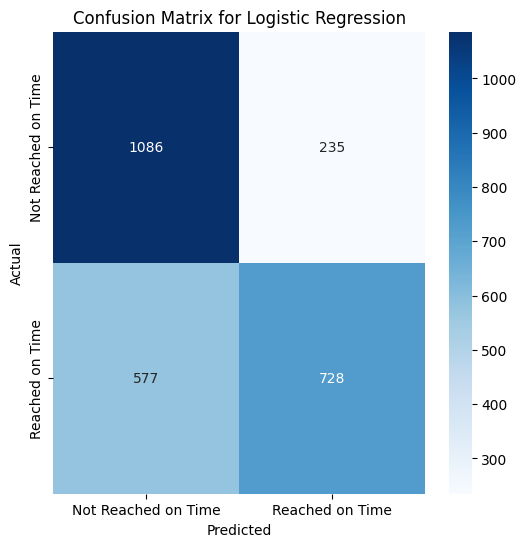

--Logistic Regression CV Classification Report--
              precision    recall  f1-score   support

           0       0.65      0.88      0.75      1321
           1       0.81      0.53      0.64      1305

    accuracy                           0.70      2626
   macro avg       0.73      0.70      0.69      2626
weighted avg       0.73      0.70      0.69      2626



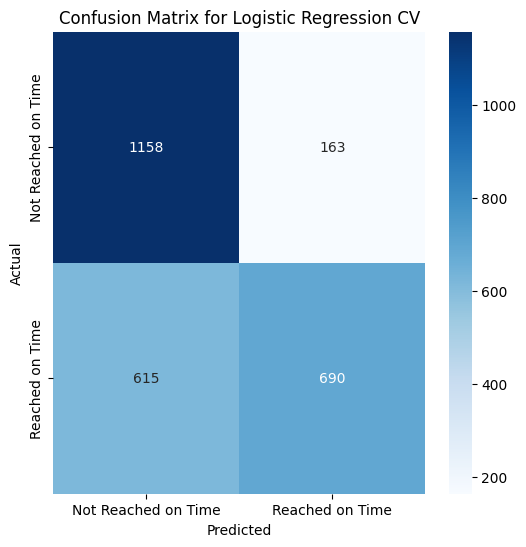

--XGBoost Classification Report--
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1321
           1       0.76      0.65      0.70      1305

    accuracy                           0.73      2626
   macro avg       0.73      0.72      0.72      2626
weighted avg       0.73      0.73      0.72      2626



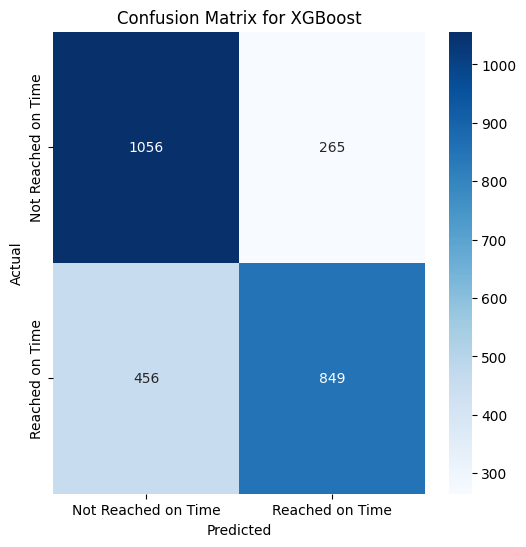

--Ridge Classifier Classification Report--
              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1321
           1       0.80      0.56      0.66      1305

    accuracy                           0.71      2626
   macro avg       0.73      0.71      0.70      2626
weighted avg       0.73      0.71      0.70      2626



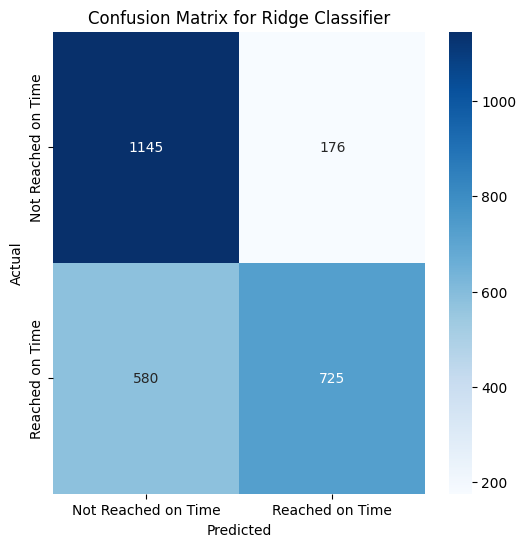

--KNN Classification Report--
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      1321
           1       0.77      0.60      0.68      1305

    accuracy                           0.71      2626
   macro avg       0.72      0.71      0.71      2626
weighted avg       0.72      0.71      0.71      2626



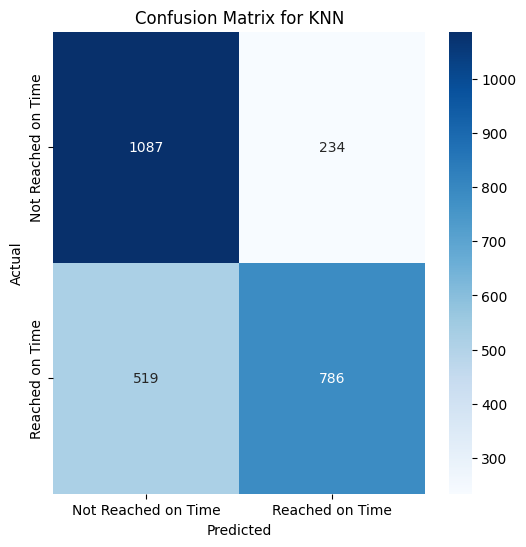

--Random Forest Classification Report--
              precision    recall  f1-score   support

           0       0.69      0.88      0.77      1321
           1       0.83      0.60      0.70      1305

    accuracy                           0.74      2626
   macro avg       0.76      0.74      0.73      2626
weighted avg       0.76      0.74      0.73      2626



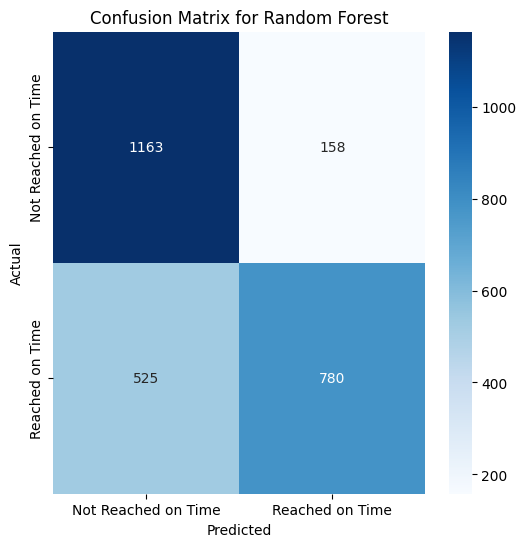

--SVM classifier Classification Report--
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      1321
           1       0.97      0.48      0.65      1305

    accuracy                           0.74      2626
   macro avg       0.81      0.73      0.72      2626
weighted avg       0.81      0.74      0.72      2626



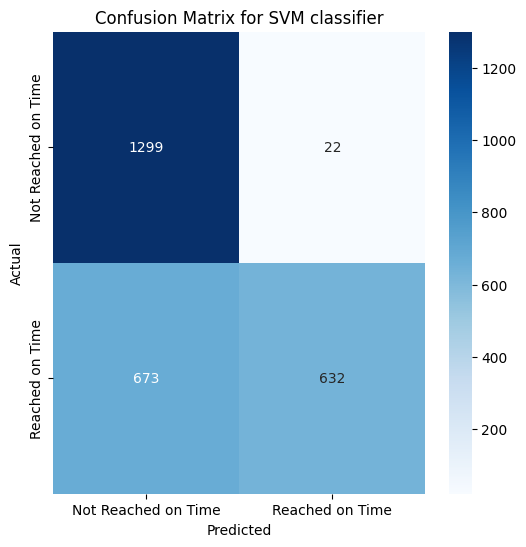

                     Name Accuracy F1-score Recall Precision
0     Logistic Regression    69.08    64.20  55.79     75.60
1  Logistic Regression CV    70.37    63.95  52.87     80.89
2                 XGBoost    72.54    70.19  65.06     76.21
3        Ridge Classifier    71.21    65.73  55.56     80.47
4                     KNN    71.33    67.61  60.23     77.06
5           Random Forest    73.99    69.55  59.77     83.16
6          SVM classifier    73.53    64.52  48.43     96.64


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Train.csv')

# Feature engineering
data['Total_Interaction'] = data['Customer_care_calls'] * data['Customer_rating']
data['Cost_per_Weight'] = data['Cost_of_the_Product'] / data['Weight_in_gms']

# Data preprocessing
data = data.fillna(method='ffill')

# Define features and target
X = data.drop(columns=['ID', 'Reached.on.Time_Y.N'])
y = data['Reached.on.Time_Y.N']

# Define numerical and categorical features
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Total_Interaction', 'Cost_per_Weight']
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess data before applying SMOTE
X_preprocessed = preprocessor.fit_transform(X)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Split resampled data into training and test sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model evaluation function
def models_eval_mm(x_train, y_train, x_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(random_state=1234),
        'Logistic Regression CV': LogisticRegressionCV(random_state=1234),
        'XGBoost': XGBClassifier(random_state=1234),
        'Ridge Classifier': RidgeClassifier(random_state=1234),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(random_state=1234),
        'SVM classifier': svm.SVC(random_state=1234)
    }

    trained_models = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        print(f'--{name}')
        print('Train Score:', model.score(x_train, y_train))
        print('Test Score:', model.score(x_test, y_test))
        print()
        trained_models[name] = model
    
    return trained_models

# Evaluate models
models = models_eval_mm(X_train_res, y_train_res, X_test_res, y_test_res)

# Evaluation function
def eval(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    result = [
        name,
        f"{accuracy_score(y_test, y_pred) * 100:.2f}",
        f"{f1_score(y_test, y_pred) * 100:.2f}",
        f"{recall_score(y_test, y_pred) * 100:.2f}",
        f"{precision_score(y_test, y_pred) * 100:.2f}"
    ]

    # Print classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)
    print(f'--{name} Classification Report--')
    print(classification_report(y_test, y_pred))
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Reached on Time', 'Reached on Time'], yticklabels=['Not Reached on Time', 'Reached on Time'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    return result, class_report

# Collect evaluation results
model_eval_info = []
classification_reports = {}

for name, model in models.items():
    results, class_report = eval(name, model, X_test_res, y_test_res)
    model_eval_info.append(results)
    classification_reports[name] = class_report

# Create a DataFrame for evaluation results
model_eval_df = pd.DataFrame(model_eval_info, columns=['Name', 'Accuracy', 'F1-score', 'Recall', 'Precision'])
model_eval_df.to_csv('model_eval.csv', index=False)

# Save classification reports
for name, report in classification_reports.items():
    report_df = pd.DataFrame(report).transpose()
    report_df.to_csv(f'classification_report_{name}.csv', index=True)

print(model_eval_df)


In [4]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

# Hyperparameter tuning for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=param_dist_xgb, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train_res, y_train_res)
best_xgb = random_search_xgb.best_estimator_

# Hyperparameter tuning for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_res, y_train_res)
best_rf = random_search_rf.best_estimator_

# Hyperparameter tuning for Logistic Regression CV
best_lcv = LogisticRegressionCV(cv=5, random_state=42, solver='lbfgs', max_iter=1000).fit(X_train_res, y_train_res)

# Hyperparameter tuning for Ridge Classifier
param_dist_rg = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
}

random_search_rg = RandomizedSearchCV(estimator=RidgeClassifier(random_state=42), param_distributions=param_dist_rg, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_rg.fit(X_train_res, y_train_res)
best_rg = random_search_rg.best_estimator_

# Hyperparameter tuning for KNN
param_dist_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_dist_knn, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_knn.fit(X_train_res, y_train_res)
best_knn = random_search_knn.best_estimator_

# Hyperparameter tuning for SVM
param_dist_svm = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

random_search_svm = RandomizedSearchCV(estimator=svm.SVC(probability=True, random_state=42), param_distributions=param_dist_svm, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_svm.fit(X_train_res, y_train_res)
best_svm = random_search_svm.best_estimator_

# Evaluate tuned models
models_tuned = {
    'Logistic Regression CV': best_lcv,
    'XGBoost': best_xgb,
    'Random Forest': best_rf,
    'Ridge Classifier': best_rg,
    'KNN': best_knn,
    'SVM': best_svm
}

# Function to evaluate models
def evaluate_models(models, x_test, y_test):
    results = []
    for name, model in models.items():
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'F1-score': f1,
            'Recall': recall_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred, output_dict=True)
        })
        print(f'--{name}--')
        print('Accuracy:', accuracy)
        print('F1-score:', f1)
        print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
        print('Classification Report:\n', classification_report(y_test, y_pred))
    return results

# Get evaluation results
evaluation_results = evaluate_models(models_tuned, X_test_res, y_test_res)

# Save evaluation results
for result in evaluation_results:
    model_name = result['Model']
    classification_report_df = pd.DataFrame(result['Classification Report']).transpose()
    classification_report_df.to_csv(f'classification_report_{model_name}.csv', index=True)

# Display evaluation results summary
eval_summary_df = pd.DataFrame([
    {
        'Model': res['Model'],
        'Accuracy': f"{res['Accuracy'] * 100:.2f}",
        'F1-score': f"{res['F1-score'] * 100:.2f}",
        'Recall': f"{res['Recall'] * 100:.2f}",
        'Precision': f"{res['Precision'] * 100:.2f}"
    }
    for res in evaluation_results
])
print(eval_summary_df)



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\Yash Singh\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 15 is smaller than n_iter=50. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\Yash Singh\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\Yash Singh\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 24 candidates, totalling 72 fits
--Logistic Regression CV--
Accuracy: 0.7037319116527038
F1-score: 0.6394810009267841
Confusion Matrix:
 [[1158  163]
 [ 615  690]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.88      0.75      1321
           1       0.81      0.53      0.64      1305

    accuracy                           0.70      2626
   macro avg       0.73      0.70      0.69      2626
weighted avg       0.73      0.70      0.69      2626

--XGBoost--
Accuracy: 0.7467631378522468
F1-score: 0.6673336668334167
Confusion Matrix:
 [[1294   27]
 [ 638  667]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.98      0.80      1321
           1       0.96      0.51      0.67      1305

    accuracy                           0.75      2626
   macro avg       0.82      0.75      0.73      2626
weighted avg       0.81      0.75      0.73  